## Plot Hydrography Datasets with Lonboard

- Repo: https://github.com/developmentseed/lonboard
- Docs: https://developmentseed.org/lonboard/
- Blog: https://developmentseed.org/blog/2024-03-29-new-in-lonboard


# Imports & Setup

In [1]:
import os
from pathlib import Path
import s3fs
import geopandas as gpd
import pyogrio
import time
import matplotlib.pyplot as plt
# import contextily as ctx
import xarray
from lonboard import viz, PolygonLayer, Map, SolidPolygonLayer
import anywidget
import ipywidgets

In [2]:
# Confirm your current working directory (cwd) and repo/project directory
working_dir = Path.cwd()
data_dir = working_dir / 'data_temp'
working_dir

PosixPath('/Users/aaufdenkampe/Documents/Python/pylimno/global_hydrography')

# Fetch/Open Data

Fetch by downloading.

## Africa Boundaries (HYDRO Basins)
https://www.hydrosheds.org/products/hydrobasins

Download: `Africa Level 02 - Standard (2MB)`
- https://data.hydrosheds.org/file/HydroBASINS/standard/hybas_af_lev02_v1c.zip

In [15]:
africa_hybas_2_fp = data_dir / 'hybas_af_lev02_v1c.zip'
africa_hybas_2 = gpd.read_file(africa_hybas_2_fp, engine='pyogrio')
africa_hybas_2.info()
africa_hybas_2

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   HYBAS_ID   8 non-null      int64   
 1   NEXT_DOWN  8 non-null      int64   
 2   NEXT_SINK  8 non-null      int64   
 3   MAIN_BAS   8 non-null      int64   
 4   DIST_SINK  8 non-null      float64 
 5   DIST_MAIN  8 non-null      float64 
 6   SUB_AREA   8 non-null      float64 
 7   UP_AREA    8 non-null      float64 
 8   PFAF_ID    8 non-null      int32   
 9   ENDO       8 non-null      int32   
 10  COAST      8 non-null      int32   
 11  ORDER      8 non-null      int32   
 12  SORT       8 non-null      int64   
 13  geometry   8 non-null      geometry
dtypes: float64(4), geometry(1), int32(4), int64(5)
memory usage: 900.0 bytes


,HYBAS_ID,NEXT_DOWN,NEXT_SINK,MAIN_BAS,DIST_SINK,DIST_MAIN,SUB_AREA,UP_AREA,PFAF_ID,ENDO,COAST,ORDER,SORT,geometry
0,1020000010,0,1020000010,1020000010,0.0,0.0,3258330.6,3258330.6,11,0,1,0,1,"MULTIPOLYGON (((33.67778 27.62917, 33.67119 27..."
1,1020011530,0,1020011530,1020011530,0.0,0.0,4660080.9,4660080.9,12,0,1,0,2,"MULTIPOLYGON (((34.80278 -19.81667, 34.79279 -..."
2,1020018110,0,1020018110,1020018110,0.0,0.0,4900405.1,4900405.1,13,0,1,0,3,"MULTIPOLYGON (((5.64444 -1.47083, 5.62972 -1.4..."
3,1020021940,0,1020021940,1020021940,0.0,0.0,4046600.5,4046600.5,14,0,1,0,4,"MULTIPOLYGON (((0.97778 5.98750, 0.97022 5.988..."
4,1020027430,0,1020027430,1020027430,0.0,0.0,6923559.6,6923559.6,15,0,1,0,5,"MULTIPOLYGON (((23.28611 32.22083, 23.28133 32..."
5,1020034170,0,1020034170,1020034170,0.0,0.0,3095083.4,3095083.4,17,0,1,0,6,"MULTIPOLYGON (((30.86944 31.47500, 30.85913 31..."
6,1020035180,0,1020035180,1020035180,0.0,0.0,597982.7,597982.7,18,0,1,0,7,"MULTIPOLYGON (((47.21111 -24.76667, 47.20775 -..."
7,1020040190,0,1020040190,1020040190,0.0,0.0,2471042.1,2471042.1,16,2,0,1,8,"POLYGON ((22.82500 20.98333, 22.82535 21.00242..."


Download: `Africa Level 03 - Standard (3MB)`
- https://data.hydrosheds.org/file/HydroBASINS/standard/hybas_af_lev03_v1c.zip

In [4]:
africa_hybas_3_fp = data_dir / 'hybas_af_lev03_v1c.zip'
africa_hybas_3 = gpd.read_file(africa_hybas_3_fp, engine='pyogrio')
africa_hybas_3

,HYBAS_ID,NEXT_DOWN,NEXT_SINK,MAIN_BAS,DIST_SINK,DIST_MAIN,SUB_AREA,UP_AREA,PFAF_ID,ENDO,COAST,ORDER,SORT,geometry
0,1030000010,0,1030000010,1030000010,0.0,0.0,236343.2,236343.2,111,0,1,0,1,"MULTIPOLYGON (((39.76528 15.42917, 39.75492 15..."
1,1030003990,0,1030003990,1030003990,0.0,0.0,519027.5,519027.5,112,0,1,0,2,"MULTIPOLYGON (((40.81528 14.75417, 40.79561 14..."
2,1030008100,0,1030008100,1030008100,0.0,0.0,797881.4,797881.4,114,0,0,1,3,"POLYGON ((36.74167 4.06667, 36.74131 4.06909, ..."
3,1030008110,0,1030008110,1030008110,0.0,0.0,1040194.7,1040194.7,117,0,1,0,4,"MULTIPOLYGON (((40.84444 -2.43333, 40.83833 -2..."
4,1030011530,0,1030011530,1030011530,0.0,0.0,4421.4,4421.4,121,0,1,0,5,"POLYGON ((36.42083 -18.56667, 36.42083 -18.570..."
5,1030011660,0,1030011660,1030011660,0.0,0.0,1378103.3,1378121.1,122,0,0,1,6,"POLYGON ((35.26250 -18.23333, 35.26215 -18.244..."
6,1030011670,0,1030011670,1030011670,0.0,0.0,245186.1,245186.1,123,0,1,0,7,"MULTIPOLYGON (((35.44861 -23.82500, 35.44252 -..."
7,1030012590,0,1030012590,1030012590,0.0,0.0,412581.2,412581.2,124,0,0,1,8,"POLYGON ((29.87083 -25.81250, 29.86998 -25.815..."
8,1030012600,0,1030012600,1030012600,0.0,0.0,403562.0,403562.0,125,0,1,0,9,"MULTIPOLYGON (((26.29028 -33.84583, 26.28531 -..."
9,1030015030,0,1030015030,1030015030,0.0,0.0,111328.1,111328.1,126,0,1,0,10,"MULTIPOLYGON (((19.41944 -34.69167, 19.40928 -..."


## NGA TDX-Hydro
https://earth-info.nga.mil/

Download: **Africa**: 1020011530 `Drainage Basins`
- https://earth-info.nga.mil/php/download.php?file=1020011530-basins-gpkg
- https://earth-info.nga.mil/php/download.php?file=1020011530-streamnet-gpkg

In [7]:
tdx_fp = data_dir /'TDX_streamreach_basins_1020011530_01.gpkg'

In [8]:
pyogrio.list_layers(tdx_fp)

array([['basins', 'Unknown']], dtype=object)

In [10]:
tdx_info = pyogrio.read_info(tdx_fp, layer=0)
tdx_info

{'crs': 'EPSG:4326',
 'encoding': 'UTF-8',
 'fields': array(['streamID'], dtype=object),
 'dtypes': array(['int64'], dtype=object),
 'geometry_type': 'Unknown',
 'features': 521206,
 'total_bounds': (11.7337222222222,
  -34.8207222222237,
  36.7989444444458,
  -8.97949999999999),
 'driver': 'GPKG',
 'capabilities': {'random_read': True,
  'fast_set_next_by_index': True,
  'fast_spatial_filter': True,
  'fast_feature_count': True,
  'fast_total_bounds': True},
 'layer_metadata': None,
 'dataset_metadata': None}

In [11]:
%%time
# Reading with pyogrio directly was faster, possibly because `use_arrow=True`
tdx_hydro_gdf = pyogrio.read_dataframe(
    tdx_fp, 
    use_arrow=True, # doesn't seem to work with s3
    layer=0,
)

CPU times: user 37.6 s, sys: 1min 57s, total: 2min 35s
Wall time: 2min 29s


In [12]:
tdx_hydro_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 521206 entries, 0 to 521205
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   streamID  521206 non-null  int64   
 1   geometry  521206 non-null  geometry
dtypes: geometry(1), int64(1)
memory usage: 8.0 MB


In [13]:
%%time
tdx_hydro = gpd.read_file(tdx_fp,  engine='pyogrio')
tdx_hydro.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 521206 entries, 0 to 521205
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   streamID  521206 non-null  int64   
 1   geometry  521206 non-null  geometry
dtypes: geometry(1), int64(1)
memory usage: 8.0 MB
CPU times: user 29.7 s, sys: 59.4 s, total: 1min 29s
Wall time: 2min 57s


In [16]:
tdx_hydro

,streamID,geometry
0,1,"POLYGON ((33.57028 -8.97950, 33.57106 -8.97950..."
1,2,"POLYGON ((33.53728 -8.98639, 33.53750 -8.98639..."
2,3,"MULTIPOLYGON (((33.62594 -9.04561, 33.62594 -9..."
3,4,"POLYGON ((33.73050 -9.02694, 33.73094 -9.02694..."
4,5,"POLYGON ((33.46983 -9.03572, 33.47006 -9.03572..."
...,...,...
521201,862566,"POLYGON ((23.90350 -18.53128, 23.90361 -18.531..."
521202,864218,"MULTIPOLYGON (((23.86661 -18.28894, 23.86661 -..."
521203,864230,"MULTIPOLYGON (((19.72894 -18.52839, 19.72894 -..."
521204,865894,"POLYGON ((15.97094 -18.53783, 15.97261 -18.537..."


## GEOGlows (streams_104)
http://geoglows-v2.s3-website-us-west-2.amazonaws.com/#streams/

Download: `streams_104.gpkg`

In [17]:
streams_fp = data_dir / 'streams_104.gpkg'
streams_104 = gpd.read_file(streams_fp,  engine='pyogrio')
streams_104

,LINKNO,DSLINKNO,strmOrder,USContArea,DSContArea,TDXHydroRegion,VPUCode,TopologicalOrder,LengthGeodesicMeters,TerminalLink,musk_k,musk_x,geometry
0,120318881,120383778,2,1.242071e+07,2.624017e+07,1020011530,104,301769,3344.568658,120520259,13378,0.25,"MULTILINESTRING ((3624661.571 -2929160.321, 36..."
1,120310563,120380453,2,1.008630e+07,2.309255e+07,1020011530,104,301851,3807.077161,120520259,15228,0.25,"MULTILINESTRING ((3621025.134 -2934105.501, 36..."
2,120332196,120377127,2,1.147404e+07,4.698504e+07,1020011530,104,301887,5588.780675,120520259,22355,0.25,"MULTILINESTRING ((3611216.650 -2936503.342, 36..."
3,120365480,120367144,2,1.114596e+07,2.637137e+07,1020011530,104,302043,658.226336,120520259,2633,0.25,"MULTILINESTRING ((3608779.990 -2944110.494, 36..."
4,120292265,120338858,2,1.122448e+07,1.529250e+07,1020011530,104,302089,1971.453691,120520259,7886,0.25,"MULTILINESTRING ((3600319.709 -2946098.593, 36..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27574,120314400,120326049,6,3.280556e+10,3.281306e+10,1020011530,104,515554,3074.209381,120302758,5610,0.25,"LINESTRING (3011118.013 -3951393.024, 3011105...."
27575,120326049,120322724,6,3.282142e+10,3.283347e+10,1020011530,104,515583,5349.329721,120302758,9762,0.25,"LINESTRING (3013468.091 -3956447.526, 3013455...."
27576,120322724,120356005,6,3.285573e+10,3.286389e+10,1020011530,104,515611,4205.906940,120302758,7675,0.25,"LINESTRING (3017092.159 -3958968.190, 3017079...."
27577,120356005,120302758,6,3.305038e+10,3.305546e+10,1020011530,104,515638,3587.276534,120302758,6546,0.25,"LINESTRING (3020444.113 -3960985.117, 3020431...."


## GEOGlows (vpu-boundaries)
http://geoglows-v2.s3-website-us-west-2.amazonaws.com/#streams-global/

Download: `vpu-boundaries.gpkg`

In [18]:
geoglow_fp = data_dir / 'vpu-boundaries.gpkg'
gdf = gpd.read_file( geoglow_fp, engine='pyogrio')
gdf

DataSourceError: /Users/aaufdenkampe/Documents/Python/pylimno/global_hydrography/data_temp/vpu-boundaries.gpkg: No such file or directory

# Layers

In [160]:
print("Hydro Basins: ", pyogrio.list_layers(hybas_fp))
print("TDX Hydro: ", pyogrio.list_layers(tdx_fp))
print("GeoGlows streams_104: ", pyogrio.list_layers(streams_fp))
print("GeoGlows vpu-boundaries: ", pyogrio.list_layers(geoglow_fp))

Hydro Basins:  [['hybas_af_lev03_v1c' 'Polygon']]
TDX Hydro:  [['basins' 'Unknown']]
GeoGlows streams_104:  [['streams_104' 'Unknown']]
GeoGlows vpu-boundaries:  [['vpu-boundaries' 'MultiPolygon']]


In [157]:
layer_tdx = gpd.read_file(tdx_fp,  engine='pyogrio', layer=0)

## Plotting TDX Hydro

Lonboard is having trouble loading the entire TDX Hydro Drainage Basins file.

In [ ]:
# viz(tdx_hydro)

It can handle smaller sections of the dataset.

In [ ]:
ids = [1, 2, 3, 4, 5, 6, 7]
viz(tdx_hydro[tdx_hydro['streamID'].isin(ids)])

## Plotting Hydro Basins

In [ ]:
viz([africa_hybas_2])

### Plotting streams_104

In [128]:
b = ['104', '105']
bottom = gdf[gdf['VPU'].isin(b)]
bottom.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 1 entries, 22 to 22
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   VPU       1 non-null      object  
 1   geometry  1 non-null      geometry
dtypes: geometry(1), object(1)
memory usage: 24.0+ bytes


Lonboard is not plotting these correctly (both using viz and layers).

In [ ]:
layer = SolidPolygonLayer.from_geopandas(
    bottom,
    get_fill_color="purple",
    get_line_color="black",
    opacity=0.5,
    pickable=True,
    auto_highlight=True,
)
Map(layer)

In [ ]:
viz(gdf)

Plot using PyPlot to show where boundaries should be on the map.

<Axes: >

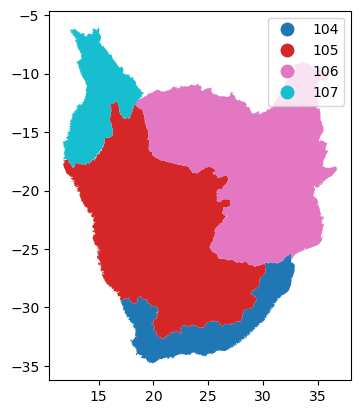

In [81]:
bottom.plot(column='VPU', legend=True)

In [ ]:
viz(gdf)